In [1]:
from vsa_explainer import visualize_vsa_contributions, highlight_top_contributing_atoms
from vsa_explainer import get_peoe_charges
import rdkit
from rdkit import Chem
from rdkit.Chem.Draw import rdMolDraw2D, MolToImage
from rdkit.Chem import rdMolDescriptors
from IPython.display import SVG, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.style': 'normal'})
plt.rcParams.update({'font.sans-serif': 'Segoe UI'})
plt.rcParams.update({'font.size': 26})

C:\Users\ChemeGrad2021\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


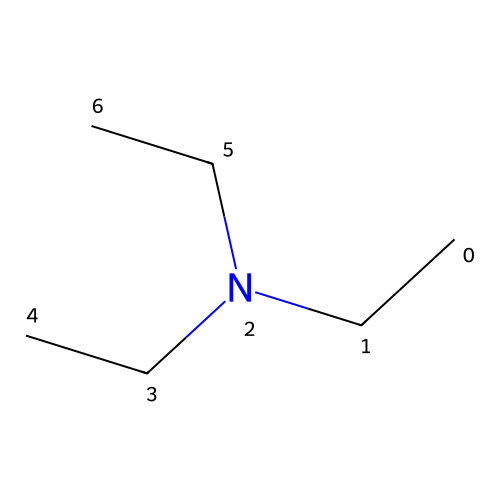

In [2]:
smiles = "CCN(CC)CC"
mol = Chem.MolFromSmiles(smiles)
drawer = rdMolDraw2D.MolDraw2DSVG(500, 500)
drawer.drawOptions().addAtomIndices = True
rdMolDraw2D.PrepareAndDrawMolecule(drawer, mol)
drawer.FinishDrawing()
svg_text = drawer.GetDrawingText()
display(SVG(svg_text))
save_path = 'manuscript/Figure_1/triethylamine.svg'
with open(save_path, "w") as f:
    f.write(svg_text)

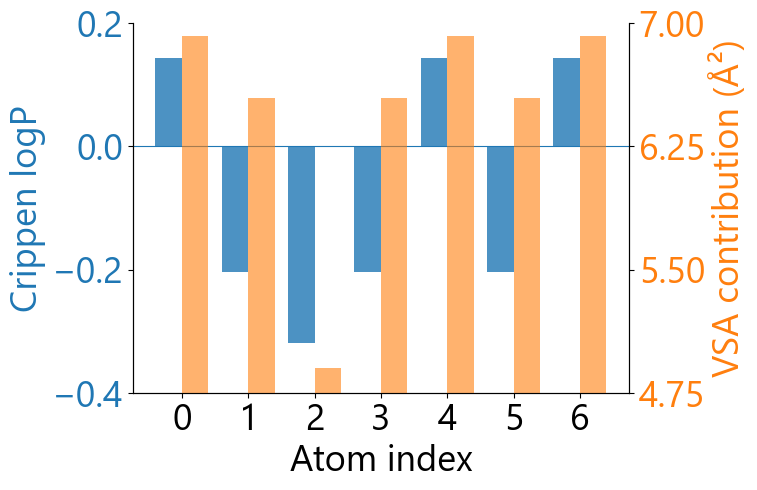

In [3]:
crippen_contribs = rdMolDescriptors._CalcCrippenContribs(mol)
values = [c[0] for c in crippen_contribs]
values
x = range(len(values))
vsa_contribs    = list(rdMolDescriptors._CalcLabuteASAContribs(mol)[0])
# plot per-atom logP contributions as a bar plot 
fig, ax = plt.subplots()
bars = ax.bar([i - 0.2 for i in x], values, width=0.4, 
               color='tab:blue', alpha=0.8,)
ax.set_xlabel('Atom index')
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_ylim([-0.4, 0.2])
ax.set_yticks([-0.4, -0.2, 0, 0.2])
ax.set_ylabel('Crippen logP', color='tab:blue')
ax.tick_params(axis='y', labelcolor='tab:blue')
ax.spines[['top']].set_visible(False)
#add horizontal line at y=0
ax.axhline(0, color='tab:blue', linewidth=0.8, linestyle='-')

ax2 = ax.twinx()
ax2.bar([i + 0.2 for i in x], vsa_contribs, 
        color='tab:orange', alpha=0.6, width=0.4)
ax2.set_ylabel(r'VSA contribution (Å²)', color='tab:orange')
ax2.set_ylim([4.75, 7])
ax2.set_yticks([4.75, 5.5, 6.25, 7])
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.spines[['top']].set_visible(False)


No atoms contribute to SlogP_VSA1 (range -inf to -0.4000).


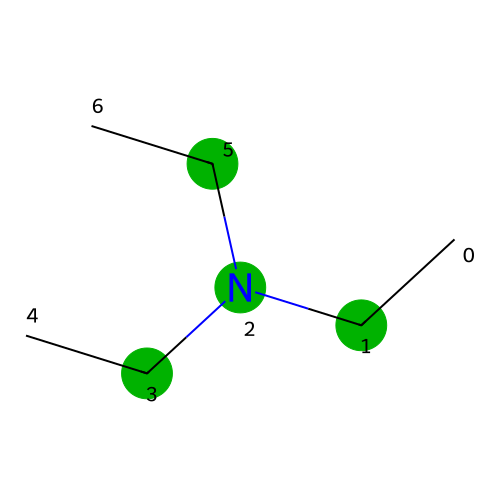


### SlogP_VSA2 Contributions — Total: 24.5342
Bin range: -0.4000 to -0.2000
Idx Sym    Value     Contrib  % of total
--------------------------------------------
1   C     -0.203       6.545        26.7%
2   N     -0.319       4.900        20.0%
3   C     -0.203       6.545        26.7%
5   C     -0.203       6.545        26.7%

No atoms contribute to SlogP_VSA3 (range -0.2000 to 0.0000).

No atoms contribute to SlogP_VSA4 (range 0.0000 to 0.1000).


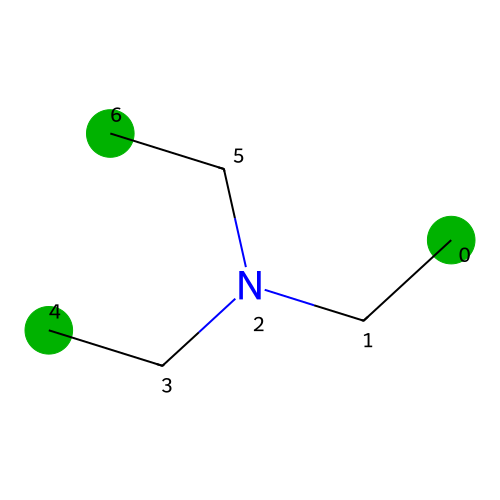


### SlogP_VSA5 Contributions — Total: 20.7712
Bin range: 0.1000 to 0.1500
Idx Sym    Value     Contrib  % of total
--------------------------------------------
0   C      0.144       6.924        33.3%
4   C      0.144       6.924        33.3%
6   C      0.144       6.924        33.3%

No atoms contribute to SlogP_VSA6 (range 0.1500 to 0.2000).

No atoms contribute to SlogP_VSA7 (range 0.2000 to 0.2500).

No atoms contribute to SlogP_VSA8 (range 0.2500 to 0.3000).

No atoms contribute to SlogP_VSA9 (range 0.3000 to 0.4000).

No atoms contribute to SlogP_VSA10 (range 0.4000 to 0.5000).

No atoms contribute to SlogP_VSA11 (range 0.5000 to 0.6000).

No atoms contribute to SlogP_VSA12 (range 0.6000 to inf).


In [4]:
visualize_vsa_contributions(smiles, ["SlogP_VSA1"])
visualize_vsa_contributions(smiles, ["SlogP_VSA2"])
visualize_vsa_contributions(smiles, ["SlogP_VSA3"])
visualize_vsa_contributions(smiles, ["SlogP_VSA4"])
visualize_vsa_contributions(smiles, ["SlogP_VSA5"])
visualize_vsa_contributions(smiles, ["SlogP_VSA6"])
visualize_vsa_contributions(smiles, ["SlogP_VSA7"])
visualize_vsa_contributions(smiles, ["SlogP_VSA8"])
visualize_vsa_contributions(smiles, ["SlogP_VSA9"])
visualize_vsa_contributions(smiles, ["SlogP_VSA10"])
visualize_vsa_contributions(smiles, ["SlogP_VSA11"])
visualize_vsa_contributions(smiles, ["SlogP_VSA12"])

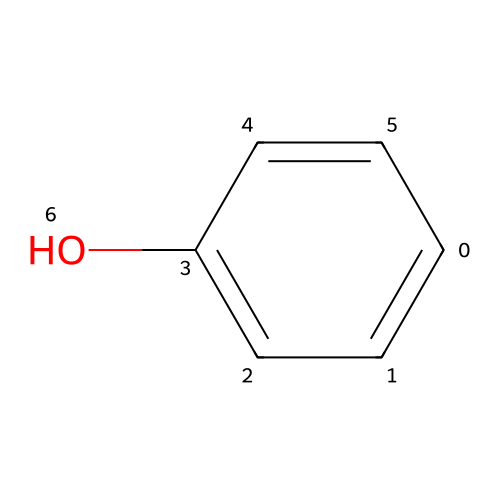

In [5]:
smiles = "C1=CC=C(C=C1)O"
mol = Chem.MolFromSmiles(smiles)
drawer = rdMolDraw2D.MolDraw2DSVG(500, 500)
drawer.drawOptions().addAtomIndices = True
rdMolDraw2D.PrepareAndDrawMolecule(drawer, mol)
drawer.FinishDrawing()
svg_text = drawer.GetDrawingText()
display(SVG(svg_text))
save_path = 'manuscript/Figure_1/phenol.svg'
with open(save_path, "w") as f:
    f.write(svg_text)

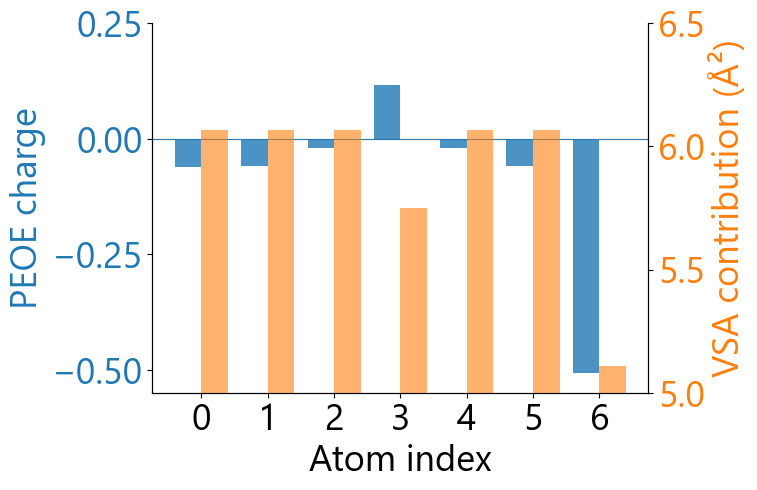

In [6]:
peoe_contribs = get_peoe_charges(mol)
values = peoe_contribs
values
x = range(len(values))
vsa_contribs    = list(rdMolDescriptors._CalcLabuteASAContribs(mol)[0])
# plot per-atom logP contributions as a bar plot 
fig, ax = plt.subplots()
bars = ax.bar([i - 0.2 for i in x], values, width=0.4, 
               color='tab:blue', alpha=0.8,)
ax.set_xlabel('Atom index')
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_ylim([-0.55, 0.25])
ax.set_yticks([-0.5, -0.25, 0, 0.25])
ax.set_ylabel('PEOE charge', color='tab:blue')
ax.tick_params(axis='y', labelcolor='tab:blue')
ax.spines[['top']].set_visible(False)
#add horizontal line at y=0
ax.axhline(0, color='tab:blue', linewidth=0.8, linestyle='-')

ax2 = ax.twinx()
ax2.bar([i + 0.2 for i in x], vsa_contribs, 
        color='tab:orange', alpha=0.6, width=0.4)
ax2.set_ylabel(r'VSA contribution (Å²)', color='tab:orange')
ax2.set_ylim([5, 6.5])
ax2.set_yticks([5, 5.5, 6, 6.5])
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.spines[['top']].set_visible(False)

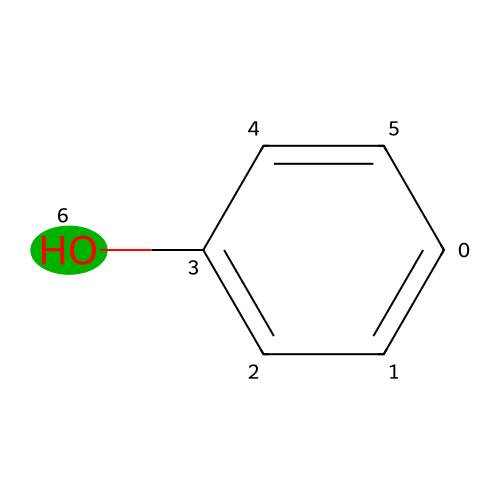


### PEOE_VSA1 Contributions — Total: 5.1065
Bin range: -inf to -0.3000
Idx Sym   Charge     Contrib  % of total
--------------------------------------------
6   O     -0.508       5.107       100.0%

No atoms contribute to PEOE_VSA2 (range -0.3000 to -0.2500).

No atoms contribute to PEOE_VSA3 (range -0.2500 to -0.2000).

No atoms contribute to PEOE_VSA4 (range -0.2000 to -0.1500).

No atoms contribute to PEOE_VSA5 (range -0.1500 to -0.1000).


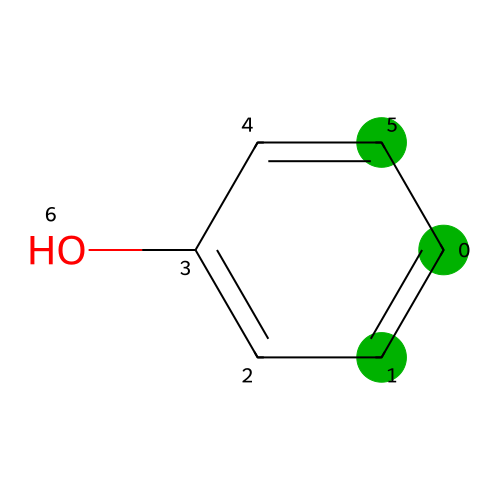


### PEOE_VSA6 Contributions — Total: 18.1991
Bin range: -0.1000 to -0.0500
Idx Sym   Charge     Contrib  % of total
--------------------------------------------
0   C     -0.062       6.066        33.3%
1   C     -0.059       6.066        33.3%
5   C     -0.059       6.066        33.3%


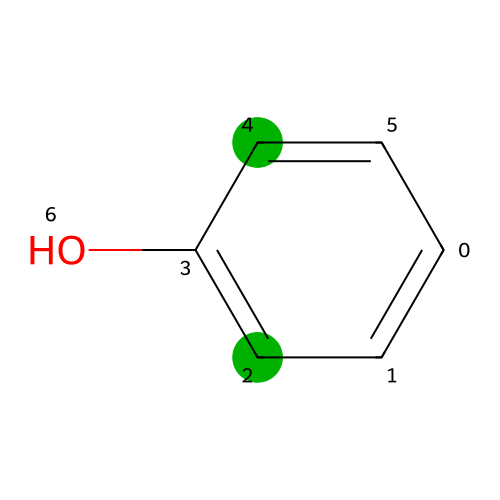


### PEOE_VSA7 Contributions — Total: 12.1327
Bin range: -0.0500 to 0.0000
Idx Sym   Charge     Contrib  % of total
--------------------------------------------
2   C     -0.020       6.066        50.0%
4   C     -0.020       6.066        50.0%

No atoms contribute to PEOE_VSA8 (range 0.0000 to 0.0500).

No atoms contribute to PEOE_VSA9 (range 0.0500 to 0.1000).


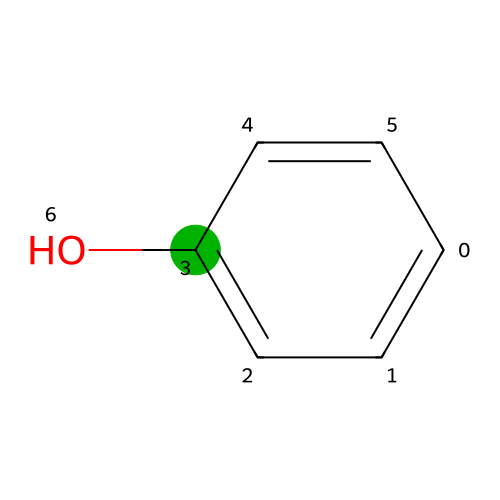


### PEOE_VSA10 Contributions — Total: 5.7495
Bin range: 0.1000 to 0.1500
Idx Sym   Charge     Contrib  % of total
--------------------------------------------
3   C      0.115       5.750       100.0%

No atoms contribute to PEOE_VSA11 (range 0.1500 to 0.2000).

No atoms contribute to PEOE_VSA12 (range 0.2000 to 0.2500).


In [7]:
visualize_vsa_contributions(smiles, ["PEOE_VSA1"])
visualize_vsa_contributions(smiles, ["PEOE_VSA2"])
visualize_vsa_contributions(smiles, ["PEOE_VSA3"])
visualize_vsa_contributions(smiles, ["PEOE_VSA4"])
visualize_vsa_contributions(smiles, ["PEOE_VSA5"])
visualize_vsa_contributions(smiles, ["PEOE_VSA6"])
visualize_vsa_contributions(smiles, ["PEOE_VSA7"])
visualize_vsa_contributions(smiles, ["PEOE_VSA8"])
visualize_vsa_contributions(smiles, ["PEOE_VSA9"])
visualize_vsa_contributions(smiles, ["PEOE_VSA10"])
visualize_vsa_contributions(smiles, ["PEOE_VSA11"])
visualize_vsa_contributions(smiles, ["PEOE_VSA12"])

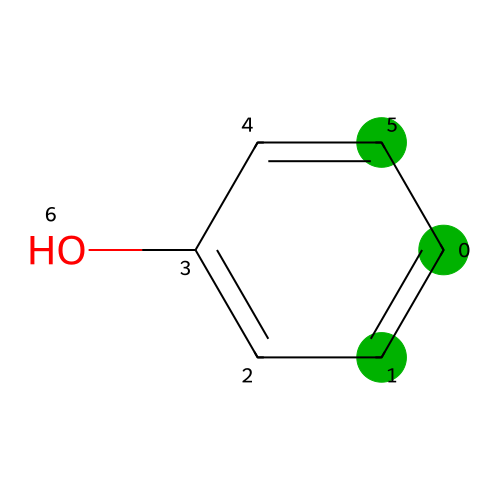


### PEOE_VSA6 Contributions — Total: 18.1991
Bin range: -0.1000 to -0.0500
Idx Sym   Charge     Contrib  % of total
--------------------------------------------
0   C     -0.062       6.066        33.3%
1   C     -0.059       6.066        33.3%
5   C     -0.059       6.066        33.3%


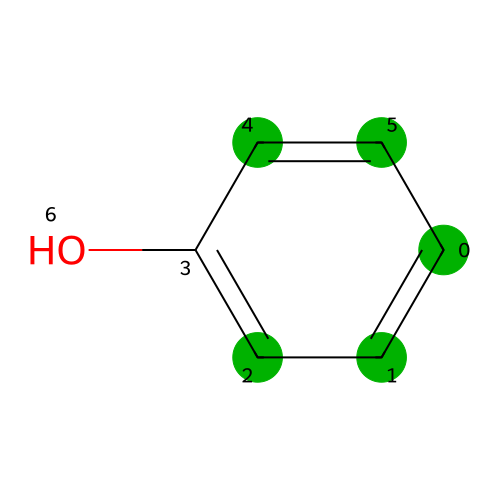


### SlogP_VSA6 Contributions — Total: 30.3318
Bin range: 0.1500 to 0.2000
Idx Sym    Value     Contrib  % of total
--------------------------------------------
0   C      0.158       6.066        20.0%
1   C      0.158       6.066        20.0%
2   C      0.158       6.066        20.0%
4   C      0.158       6.066        20.0%
5   C      0.158       6.066        20.0%


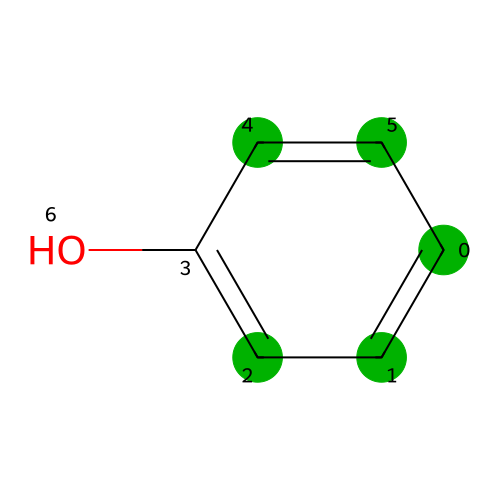


### SMR_VSA7 Contributions — Total: 30.3318
Bin range: 3.0500 to 3.6300
Idx Sym    Value     Contrib  % of total
--------------------------------------------
0   C      3.350       6.066        20.0%
1   C      3.350       6.066        20.0%
2   C      3.350       6.066        20.0%
4   C      3.350       6.066        20.0%
5   C      3.350       6.066        20.0%


In [16]:
visualize_vsa_contributions(smiles, ["PEOE_VSA6"])
visualize_vsa_contributions(smiles, ["SlogP_VSA6"])
visualize_vsa_contributions(smiles, ["SMR_VSA7"])

Top 3 contributing atoms (frequency mode):
Idx  Atom      Score
----------------------
5    C        3.0000
1    C        3.0000
0    C        3.0000


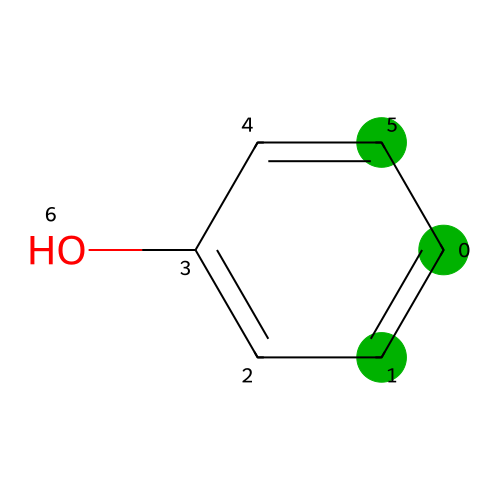

In [18]:
highlight_top_contributing_atoms(
    smiles,
    descriptors=["PEOE_VSA6", "SlogP_VSA6", 'SMR_VSA7'],
    number_atoms=3,
    mode="frequency"
)